# Mutation Up Analysis, Round02 - 06-03-2020
This Jupyter notebook will graph out the results of the second round of experiments. Previous rounds of experiments were not run correctly and the results were faulty.

In the experiments whose results are graphed below, a clonal population of a provided wild-type was evolved for 500,000 generations with an elevated mutation rate (point mutations = small insertions = small deletions = 4e-7; default (control) value = 1e-7). 

Five random seeds were used to validate the data; in all of the graphs, we graph out the *control* vs. *mutation up* condition.


## Read in the data and set up the environment

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from ReadFunctions import read_fitness, read_bp, read_genes, read_robustness

# Laptop
INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

# Desktop
#INPUT_ROOT_DIR = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "Graphics//mut_up_analysis//"
WINDOW_SIZE = 10000

# Make sure that the output directories exist and create them if not
if not os.path.exists(OUTPUT_ROOT_DIR):
    os.mkdir(OUTPUT_ROOT_DIR)
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_best//"):
    os.mkdir(OUTPUT_ROOT_DIR + "fitness_best//")
if not os.path.exists(OUTPUT_ROOT_DIR + "bp_best//"):
    os.mkdir(OUTPUT_ROOT_DIR + "bp_best//")
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_best//"):
    os.mkdir(OUTPUT_ROOT_DIR + "genes_best//")
if not os.path.exists(OUTPUT_ROOT_DIR + "robustness//"):
    os.mkdir(OUTPUT_ROOT_DIR + "robustness//")

print("Reading in the data...")

# STAT_BP_BEST
bp_best_names = ['generation', 'num_bp_not_in_any_CDS', 'num_bp_not_in_any_functional_CDS', 'num_bp_not_in_any_non-functional_CDS', 'num_bp_not_included_in_any_RNA', 'num_bp_not_included_in_any_coding_RNA', 'num_bp_not_included_in_any_non-coding_RNA', 'num_of_non-essential_bp', 'num_of_non-essential_bp_including_non-functional_genes']
# Control
df_seed01_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out")
df_seed02_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out")
df_seed03_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out")
df_seed04_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out")
#df_seed05_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out")

# Mutation Up
df_seed01_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out")
df_seed02_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out")
df_seed03_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out")
#df_seed04_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out")
#df_seed05_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out")

# STAT_FITNESS_BEST
fitness_best_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']
# Control
df_seed01_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out")
df_seed02_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out")
df_seed03_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out")
df_seed04_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out")
#df_seed05_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out")

# Mutation Up
df_seed01_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out")
df_seed02_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out")
df_seed03_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out")
#df_seed04_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out")
#df_seed05_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out")

# STAT_GENES_BEST
genes_best_names = ['generation', 'num_coding_RNAs', 'num_non-coding_RNAs', 'avg_size_of_coding_RNAs', 'avg_size_of_non-coding_RNAs', 'num_functional_genes', 'num_non-functional_genes', 'avg_size_of_functional_genes', 'avg_size_of_non-functional_genes']

# Control
df_seed01_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed01//control//stats//stat_genes_best.out")
df_seed02_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed02//control//stats//stat_genes_best.out")
df_seed03_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed03//control//stats//stat_genes_best.out")
df_seed04_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed04//control//stats//stat_genes_best.out")
#df_seed05_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed05//control//stats//stat_genes_best.out")

# Mutation Up
df_seed01_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_genes_best.out")
df_seed02_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_genes_best.out")
df_seed03_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_genes_best.out")
#df_seed04_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_genes_best.out")
#df_seed05_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_genes_best.out")

# ROBUSTNESS

# Control
df_seed01_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed01//control//seed01_control_ancestor_robustness.out")
#df_seed02_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed02//control//seed02_control_ancestor_robustness.out")
#df_seed03_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed03//control//seed03_control_ancestor_robustness.out")
#df_seed04_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed04//control//seed04_control_ancestor_robustness.out")
#df_seed05_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed05//control//seed05_control_ancestor_robustness.out")

# Drop NaN columns
#df_seed01_control_robustness.dropna(axis='columns',how='any', inplace=True)
df_seed01_control_robustness.drop(labels=['cumul_delta-gap_positive_offspring', 'cumul_delta-fitness_positive_offspring'], axis='columns', inplace=True)
#df_seed01_control_robustness['cumul_delta-fitness_positive_offspring'].fillna(0)

# Mutation Up
#df_seed01_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed01//mut_up//seed01_mutation_up_robustness.out")
#df_seed02_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed02//mut_up//seed02_mutation_up_robustness.out")
#df_seed03_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed03//mut_up//seed03_mutation_up_robustness.out")
#df_seed04_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed04//mut_up//seed04_mutation_up_robustness.out")
#df_seed05_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed05//mut_up//seed05_mutation_up_robustness.out")

print("Done.")


Reading in the data...
Done.


## Graph results

Graphing...
fitness_best

Done with fitness_best

bp_best
done with bp_best
genes_best
done with genes_best
ancestor_robustness


ValueError: Axis limits cannot be NaN or Inf

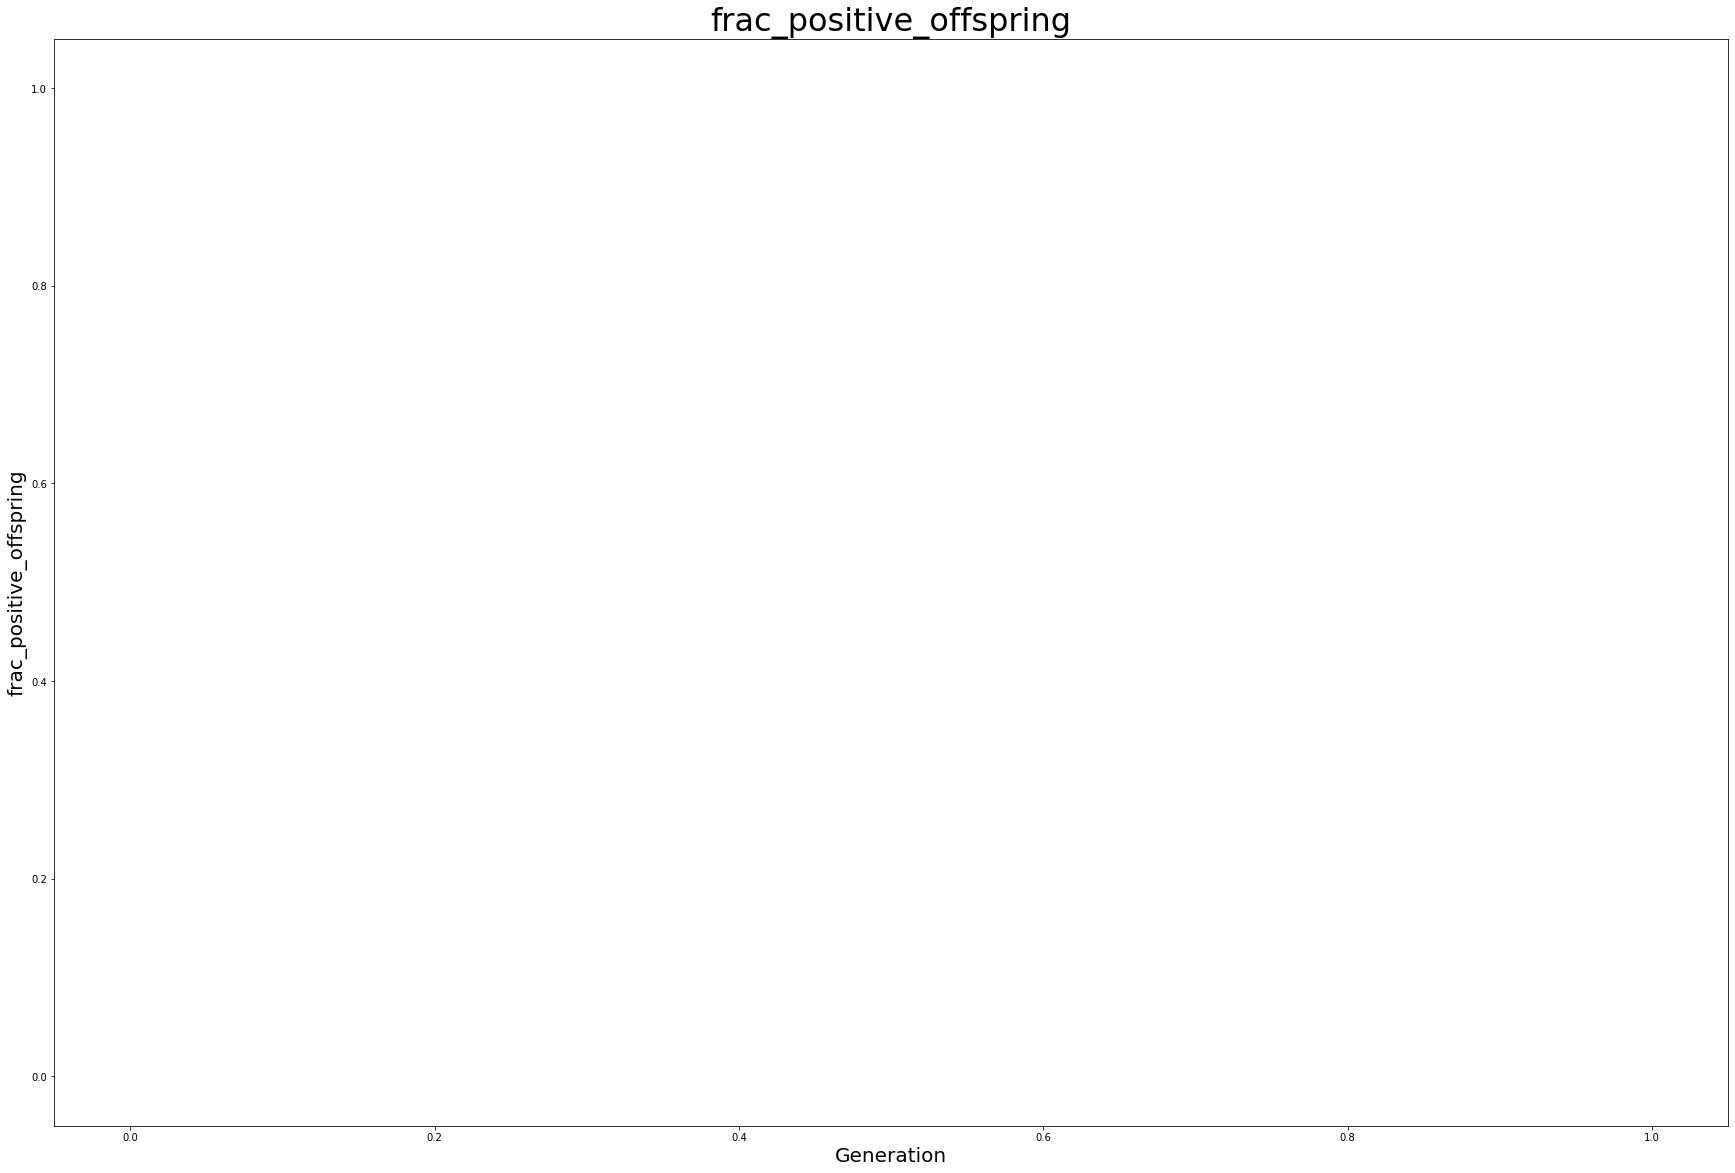

In [6]:
print("Graphing...")

print("fitness_best")
invalid_fitness_names = ["generation", "amt_compound_present", "parents_secretion_error", "pop_size", "secretion_error"]
for col_header in fitness_best_names:
    if col_header in invalid_fitness_names: 
        continue
    else:
        # CREATE A NEW FIGURE
        fig_fitness = plt.figure(figsize=(30,20))
        ax_fitness = fig_fitness.add_subplot(111)
        ax_fitness.set_title(col_header, fontsize=32)
        ax_fitness.set_xlabel("Generation", fontsize=20)
        ax_fitness.set_ylabel(col_header, fontsize=20)
        
        # PLOT THE DATAFRAMES
        
        # seed01 control
        df_tmp1 = df_seed01_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label="seed01_control", ax=ax_fitness)
                      
        # seed02 control
        df_tmp2 = df_seed02_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, label="seed02_control", ax=ax_fitness)
        
        # seed03 control
        df_tmp3 = df_seed03_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, label="seed03_control", ax=ax_fitness)
        
        # seed04 control
        df_tmp4 = df_seed04_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, label="seed04_control", ax=ax_fitness)
        
        # seed05 control
        #df_tmp5 = df_seed05_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp5.plot(x='generation', y=col_header, label="seed05_control", ax=ax_fitness)
        
        # seed01 mutation up
        df_tmp6 = df_seed01_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, linestyle='dashed', label="seed01_mutation_up", ax=ax_fitness)
        
        # seed02 mutation_up
        df_tmp7 = df_seed02_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, linestyle='dashed', label="seed02_mut_up", ax=ax_fitness)
        
        # seed03 mutation_up
        df_tmp8 = df_seed03_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, linestyle='dashed', label="seed03_mut_up", ax=ax_fitness)
        
        # seed04 mutation_up
        #df_tmp9 = df_seed04_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp9.plot(x='generation', y=col_header, linestyle='dashed', label="seed04_mut_up", ax=ax_fitness)
        
        # seed05 mutation_up
        #df_tmp10 = df_seed05_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp10.plot(x='generation', y=col_header, linestyle='dashed', label="seed05_mut_up", ax=ax_fitness)
        fig_fitness.savefig(OUTPUT_ROOT_DIR + "fitness_best//fitness_" + col_header+".png")


del df_tmp1, df_tmp2, df_tmp6, df_tmp7
plt.close('all')

print("\nDone with fitness_best\n") 

print("bp_best")
invalid_bp_best_names = ["generation", "amt_compound_present", "parents_secretion_error", "pop_size", "secretion_error"]
for col_header in bp_best_names:
    if col_header in invalid_bp_best_names:
        continue
    else:
        # CREATE A NEW FIGURE
        fig_bp_best = plt.figure(figsize=(30,20))
        ax_bp_best = fig_bp_best.add_subplot(111)
        ax_bp_best.set_title(col_header, fontsize=32)
        ax_bp_best.set_xlabel("Generation", fontsize=20)
        ax_bp_best.set_ylabel(col_header, fontsize=20)
        
        # PLOT THE DATAFRAMES
        
        # seed01 control
        df_tmp1 = df_seed01_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label="seed01_control", ax=ax_bp_best)
        
        # seed02 control
        df_tmp2 = df_seed02_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, label="seed02_control", ax=ax_bp_best)
        
        # seed03 control
        df_tmp3 = df_seed03_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, label="seed03_control", ax=ax_bp_best)
        
        # seed04 control
        df_tmp4 = df_seed04_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, label="seed04_control", ax=ax_bp_best)
        
        # seed05 control
        # df_tmp5 = df_seed05_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        # df_tmp5.plot(x='generation', y=col_header, label="seed05_control", ax=ax_bp_best)
        
        # seed01 mutation up
        df_tmp6 = df_seed01_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, linestyle='dashed', label="seed01_mutation_up", ax=ax_bp_best)
        
        # seed02 mutation up
        df_tmp7 = df_seed02_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, linestyle='dashed', label="seed02_mut_up", ax=ax_bp_best)
        
        # seed03 mutation up
        df_tmp8 = df_seed03_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, linestyle='dashed', label="seed03_mut_up", ax=ax_bp_best)
        
        # seed04 mutation up
        #df_tmp9 = df_seed04_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp9.plot(x='generation', y=col_header, linestyle='dashed', label="seed04_mut_up", ax=ax_bp_best)
        
        # seed05 mutation up
        #df_tmp10 = df_seed05_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp10.plot(x='generation', y=col_header, linestyle='dashed', label="seed05_mut_up", ax=ax_bp_best)
        
        fig_bp_best.savefig(OUTPUT_ROOT_DIR + "bp_best//bp_best_"+col_header+".png")

del df_tmp1, df_tmp2, df_tmp6, df_tmp7
plt.close('all')
print("done with bp_best")

print("genes_best")
for col_header in genes_best_names:
    if col_header == "generation":
        continue
    else:
        # CREATE A NEW FIGURE
        fig_genes_best = plt.figure(figsize=(30,20))
        ax_genes_best = fig_genes_best.add_subplot(111)
        ax_genes_best.set_title(col_header, fontsize=32)
        ax_genes_best.set_xlabel("Generation", fontsize=20)
        ax_genes_best.set_ylabel(col_header, fontsize=20)
        
        # PLOT THE DATAFRAMES
        
        # seed01 control
        df_tmp1 = df_seed01_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label="seed01_control", ax=ax_genes_best)
        
        # seed02 control
        df_tmp2 = df_seed02_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, label="seed02_control", ax=ax_genes_best)
        
        # seed03 control
        df_tmp3 = df_seed03_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, label="seed03_control", ax=ax_genes_best)
        
        # seed04 control
        df_tmp4 = df_seed04_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, label="seed04_control", ax=ax_genes_best)
        
        # seed05 control
        #df_tmp5 = df_seed05_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp5.plot(x='generation', y=col_header, label="seed05_control", ax=ax_genes_best)
        
        # seed01 mutation up
        df_tmp6 = df_seed01_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, linestyle='dashed', label="seed01_mutation_up", ax=ax_genes_best)
        
        # seed02 mutation up
        df_tmp7 = df_seed02_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, linestyle='dashed', label="seed02_mutation_up", ax=ax_genes_best)
        
        # seed03 mutation up
        df_tmp8 = df_seed03_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, linestyle='dashed', label="seed03_mutation_up", ax=ax_genes_best)
        
        # seed04 mutation up
        #df_tmp9 = df_seed04_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp9.plot(x='generation', y=col_header, linestyle='dashed', label="seed04_mutation_up", ax=ax_genes_best)
        
        # seed05 mutation up
        #df_tmp10 = df_seed05_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        #df_tmp10.plot(x='generation', y=col_header, linestyle='dashed', label="seed05_mutation_up", ax=ax_genes_best)
        
        # Save the figure
        fig_genes_best.savefig(OUTPUT_ROOT_DIR + "genes_best//genes_best_"+col_header+".png")

del df_tmp1, df_tmp2, df_tmp6, df_tmp7
plt.close('all')        
print("done with genes_best")

print("ancestor_robustness")
robustness_names = ['generation', 'frac_positive_offspring', 'frac_neutral_offspring', 'frac_neutral_mutants', 'frac_negative_offspring', 'cumul_delta-gap_positive_offspring', 'cumul_delta-gap_negative_offspring', 'delta-gap_best_offspring', 'delta-gap_worst_offspring', 'cumul_delta-fitness_positive_offspring', 'cumul_delta-fitness_negative_offspring', 'delta-fitness_best_offspring', 'delta-fitness_worst_offspring']

for col_header in robustness_names:
    if col_header == "generation":
        continue
    else:
        # CREATE A NEW FIGURE
        fig_ancestor_robustness = plt.figure(figsize=(30,20))
        ax_ancestor_robustness = fig_ancestor_robustness.add_subplot(111)
        ax_ancestor_robustness.set_title(col_header, fontsize=32)
        ax_ancestor_robustness.set_xlabel("Generation", fontsize=20)
        ax_ancestor_robustness.set_ylabel(col_header, fontsize=20)
        
        df_tmp1 = df_seed01_control_robustness[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label='seed01_control', ax=ax_ancestor_robustness)

        # Save the figure
        fig_ancestor_robustness.savefig(OUTPUT_ROOT_DIR + "robustness//robustness_"+col_header+".png")
print("Graphing complete.")